<a href="https://colab.research.google.com/github/gzanellato-ia/burrowing_parrot/blob/main/burrowing_parrots_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?export=view&id=1CHoxaz7sslroSHaP8IINZtgp6yuVrKZM' width=200 align='right'>

#**Automatic counting of Burrowing Parrot nests**
##Parrot colony in El Cóndor
##Río Negro Province, Argentina

<img src='https://drive.google.com/uc?export=view&id=1YeDCnNV4zKYsjiz_x08wCWAOPH3NaxxV' width=200 align='right'>

##### Gabriel Zanellato - Juan Masello - Gabriel Pagnossin

#### Marzo 2022

<img src='https://drive.google.com/uc?export=view&id=14Qs7erhsP5T1V8KGpsfxEZuKFMnjHRVX' width=300>



## Implementation of the UNet architecture

## References:

https://github.com/zhixuhao/unet

https://github.com/dwaithe/U-net-for-density-estimation

https://medium.com/coinmonks/learn-how-to-train-u-net-on-your-dataset-8e3f89fbd623


<img src='https://drive.google.com/uc?export=view&id=14JPYxhgndXBJ3f7SYnwdeXBobCBIccSi' width=650>  Ref.: https://github.com/zhixuhao/unet


In [ ]:
# Copyright: Gabriel Zanellato, 2022
# Based on Lempitsky (2010), Fiaschi (2012), Xie(2018), Ronneberger(2015) and Waithe(2017)

from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/Data_loros/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Aug 23 23:22:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.model_selection import train_test_split
import os

## Importing the images containing the nests and the points marked by the expert

In [ ]:
lista_carpetas = ['parches', 'puntos']

nombres_imagenes  = os.listdir(BASE_FOLDER + '/' + lista_carpetas[0])
nombres_puntos    = os.listdir(BASE_FOLDER + '/' + lista_carpetas[1])

print(lista_carpetas[0])
print(nombres_imagenes)
print('')
print(lista_carpetas[1])
print(nombres_puntos)


# Shuffling
import random

random.seed(0)
random.shuffle(nombres_imagenes)

print("\nshuffled images")
print(nombres_imagenes)

parches
['parche_001.png', 'parche_002.png', 'parche_008.png', 'parche_004.png', 'parche_011.png', 'parche_007.png', 'parche_013.png', 'parche_005.png', 'parche_012.png', 'parche_009.png', 'parche_003.png', 'parche_006.png', 'parche_014.png', 'parche_010.png', 'parche_017.png', 'parche_020.png', 'parche_016.png', 'parche_018.png', 'parche_021.png', 'parche_015.png', 'parche_019.png', 'parche_023.png', 'parche_026.png', 'parche_025.png', 'parche_024.png', 'parche_022.png', 'parche_027.png', 'parche_029.png', 'parche_034.png', 'parche_032.png', 'parche_030.png', 'parche_031.png', 'parche_036.png', 'parche_035.png', 'parche_033.png', 'parche_028.png', 'parche_037.png', 'parche_041.png', 'parche_040.png', 'parche_044.png', 'parche_042.png', 'parche_043.png', 'parche_038.png', 'parche_039.png', 'parche_046.png', 'parche_045.png', 'parche_047.png', 'parche_050.png', 'parche_052.png', 'parche_054.png', 'parche_056.png', 'parche_055.png', 'parche_053.png', 'parche_051.png', 'parche_049.png', '

In [ ]:
# Importing the images

imagen = []
puntos = []

qty = len(nombres_imagenes)

for i in range(qty):

    print('Importing image #', i+1, 'of', str(qty))
    imagen.append(io.imread(BASE_FOLDER + '/' + lista_carpetas[0] + '/' + nombres_imagenes[i]))
    puntos.append(io.imread(BASE_FOLDER + '/' + lista_carpetas[1] + '/' + nombres_imagenes[i]))

imagen = np.array(imagen)/255.
puntos = np.array(puntos)/255.

print(imagen.shape)
print(puntos.shape)

Importing image # 1 of 312
Importing image # 2 of 312
Importing image # 3 of 312
Importing image # 4 of 312
Importing image # 5 of 312
Importing image # 6 of 312
Importing image # 7 of 312
Importing image # 8 of 312
Importing image # 9 of 312
Importing image # 10 of 312
Importing image # 11 of 312
Importing image # 12 of 312
Importing image # 13 of 312
Importing image # 14 of 312
Importing image # 15 of 312
Importing image # 16 of 312
Importing image # 17 of 312
Importing image # 18 of 312
Importing image # 19 of 312
Importing image # 20 of 312
Importing image # 21 of 312
Importing image # 22 of 312
Importing image # 23 of 312
Importing image # 24 of 312
Importing image # 25 of 312
Importing image # 26 of 312
Importing image # 27 of 312
Importing image # 28 of 312
Importing image # 29 of 312
Importing image # 30 of 312
Importing image # 31 of 312
Importing image # 32 of 312
Importing image # 33 of 312
Importing image # 34 of 312
Importing image # 35 of 312
Importing image # 36 of 312
I

## Inspect and visualize data

In [ ]:
imagen[0]

array([[[0.50980392, 0.50196078, 0.51372549],
        [0.50196078, 0.50196078, 0.50980392],
        [0.49411765, 0.49411765, 0.50196078],
        ...,
        [0.5372549 , 0.54117647, 0.54901961],
        [0.54117647, 0.54901961, 0.54509804],
        [0.54117647, 0.54901961, 0.54509804]],

       [[0.4627451 , 0.4627451 , 0.47058824],
        [0.47058824, 0.47058824, 0.47843137],
        [0.48627451, 0.48627451, 0.49411765],
        ...,
        [0.54117647, 0.54509804, 0.55294118],
        [0.54509804, 0.55294118, 0.54901961],
        [0.54901961, 0.55686275, 0.55294118]],

       [[0.48235294, 0.48235294, 0.49019608],
        [0.47843137, 0.47843137, 0.48627451],
        [0.49019608, 0.49019608, 0.49803922],
        ...,
        [0.54509804, 0.54901961, 0.55686275],
        [0.55294118, 0.56078431, 0.55686275],
        [0.55686275, 0.56470588, 0.56078431]],

       ...,

       [[0.49411765, 0.50196078, 0.49803922],
        [0.48235294, 0.48627451, 0.49411765],
        [0.47843137, 0

In [ ]:
# Dot images are in 4 channels, CMYK, Cyan, Magenta, Yellow, Black
puntos[0]

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

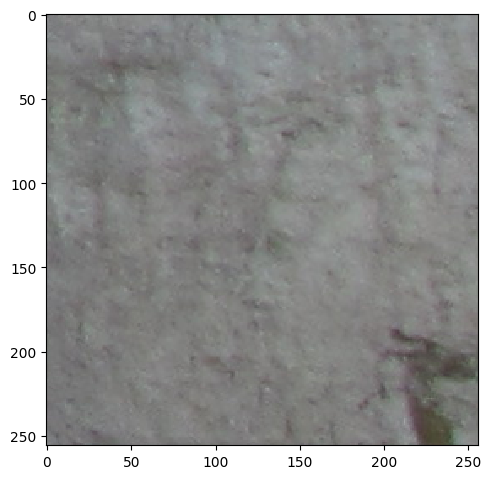

In [ ]:
# Showing the first image
plt.figure(figsize = (5,5))
io.imshow(imagen[0])

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


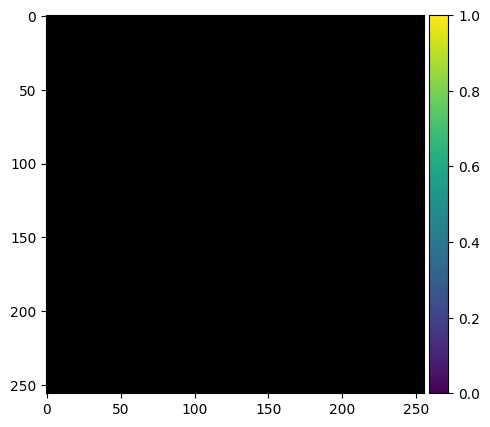

In [ ]:
plt.figure(figsize = (5,5))
io.imshow(puntos[0])

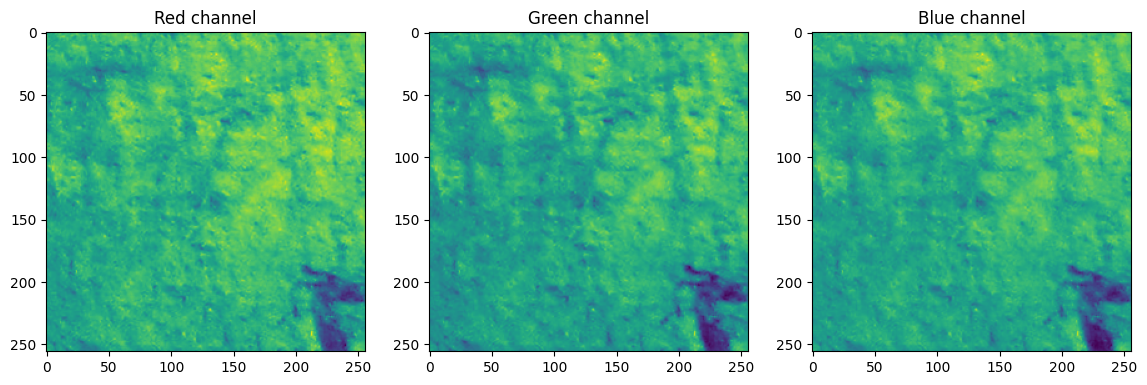

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14, 6))

ax[0].imshow(imagen[0][:,:,0])    # Red channel
ax[1].imshow(imagen[0][:,:,1])    # Green channel
ax[2].imshow(imagen[0][:,:,2])    # Blue channel

ax[0].set_title('Red channel')
ax[1].set_title('Green channel')
ax[2].set_title('Blue channel')

plt.show()


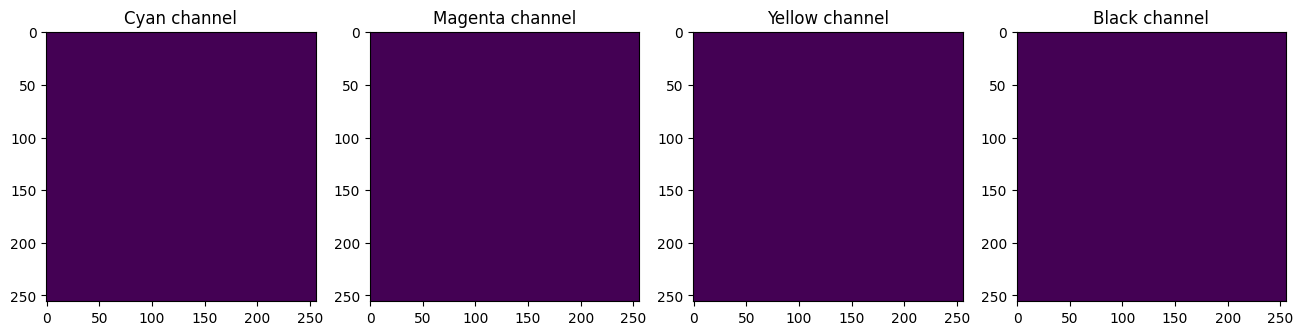

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16, 12))

ax[0].imshow(puntos[0][:,:,0])    # Cyan channel
ax[1].imshow(puntos[0][:,:,1])    # Magenta channel
ax[2].imshow(puntos[0][:,:,2])    # Yellow channel
ax[3].imshow(puntos[0][:,:,3])    # Black channel


ax[0].set_title('Cyan channel')
ax[1].set_title('Magenta channel')
ax[2].set_title('Yellow channel')
ax[3].set_title('Black channel')

plt.show()

In [ ]:
puntos[0][:,:,0].max()

0.0

#### We will take channel 0, Cyan, to generate the ground truth images

### Ground Truth computation

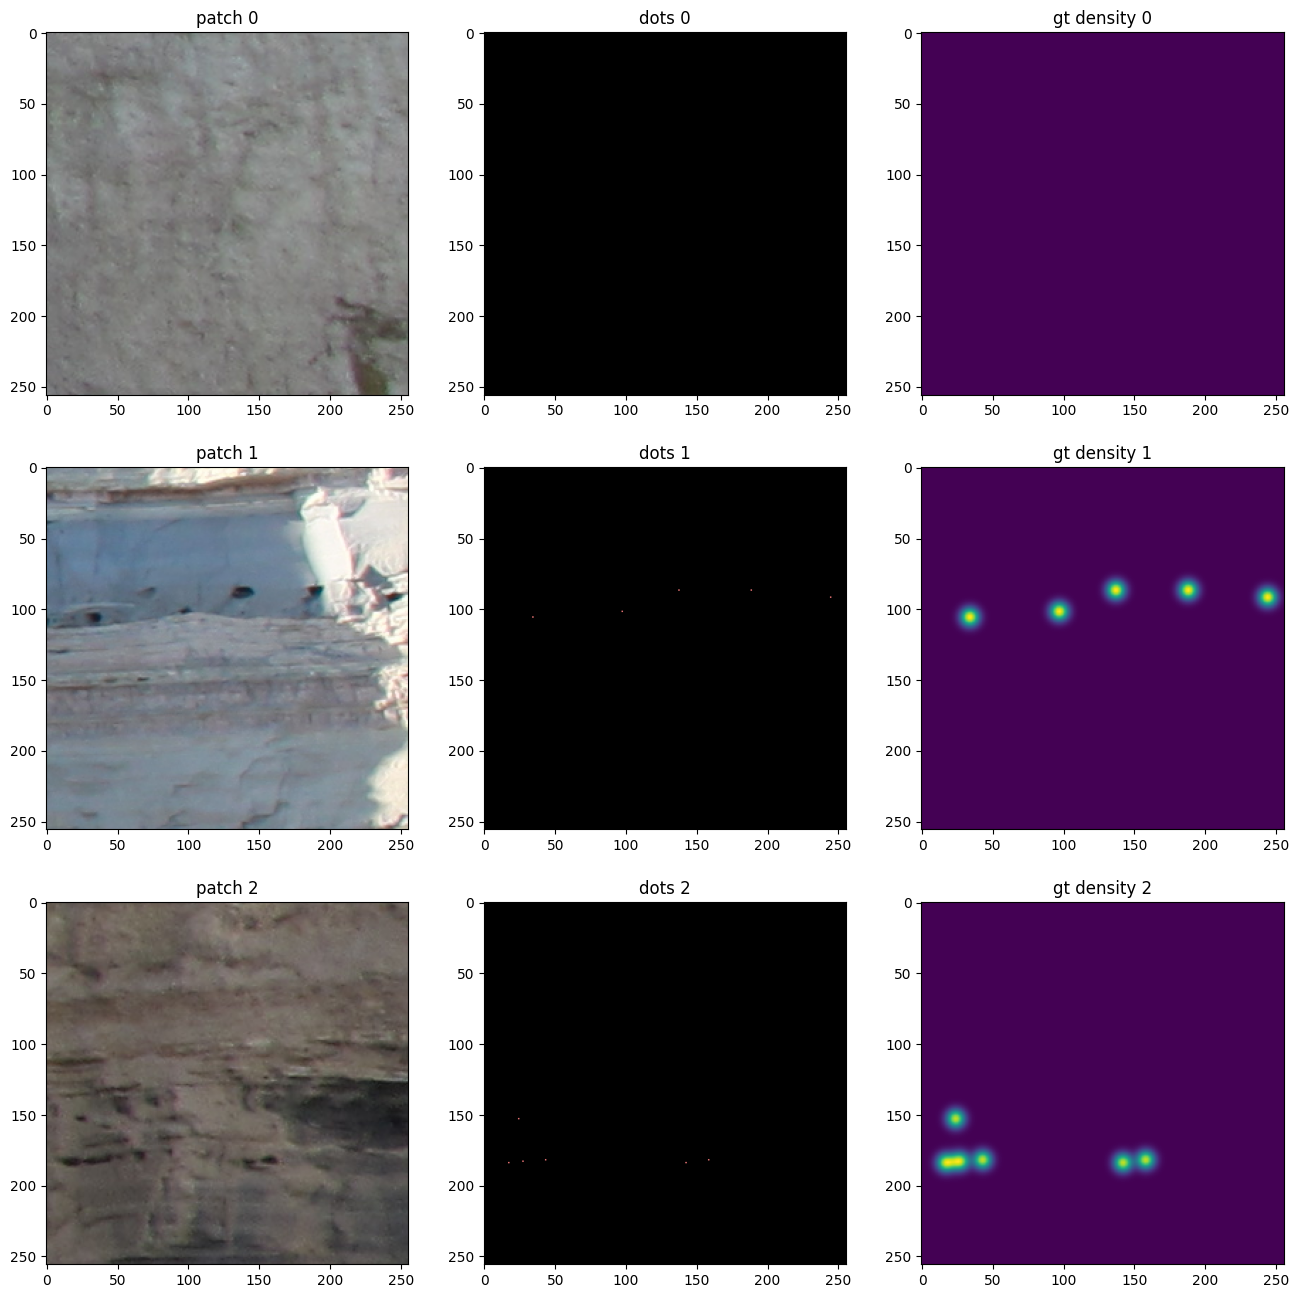

In [ ]:
# Applying the Gaussian Kernel on the points marked by the experts

from skimage.filters import gaussian

densidad_gt = np.zeros(shape=(qty,256,256))

for i in range(qty):

    densidad_gt[i,:,:] = gaussian(puntos[i][:,:,0], sigma=4.5)  # The scale of the Gaussian is a user parameter Sigma which should roughly match the object size.
                                                                # https://www.ilastik.org/documentation/counting/counting#sec_reference
                                                                # Points information in red channel [:,:,0]

# sigma = standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence,
# or as a single number, in which case it is equal for all axes.

fig, ax = plt.subplots(3,3, figsize=(16, 16))

# Inspecting the first 3 images:
for i in range(3):
    ax[i,0].imshow(imagen[i])
    ax[i,1].imshow(puntos[i])
    ax[i,2].imshow(densidad_gt[i])

    ax[i,0].set_title('patch ' + str(i))
    ax[i,1].set_title('dots ' + str(i))
    ax[i,2].set_title('gt density '+ str(i))

    plt.rcParams["axes.grid"] = False

plt.show()

In [ ]:
print(densidad_gt.min())
print(densidad_gt.max())

0.0
0.04827504360859346


### Selection of training and testing images

In [ ]:
# Number of training + validation images
N = 296

In [ ]:
# Training + Validation set

x_train = np.zeros(shape=(N,256,256,3))
y_train = np.zeros(shape=(N,256,256))


for i in range(N):

    x_train[i,:,:,:] = imagen[i]
    y_train[i,:,:] = densidad_gt[i]

# Testing set

inicio_test = N

rango_test = range(inicio_test, qty)
print('testing range:', rango_test)

x_test = np.zeros(shape=(qty-inicio_test,256,256,3))           # we use the 3 RGB channels
y_test = np.zeros(shape=(qty-inicio_test,256,256))

for i in rango_test:
    x_test[i-inicio_test,:,:,:]  = imagen[i]                   # we use the 3 RGB channels
    y_test[i-inicio_test,:,:]  = densidad_gt[i]

print('\n')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

testing range: range(296, 312)


(296, 256, 256, 3)
(296, 256, 256)
(16, 256, 256, 3)
(16, 256, 256)


In [ ]:
y_train.max()

0.04827504360859346

In [ ]:
# It is important to scale the density kernels from 0.0-1.0 to something higher ( in this case 0.0-255.0),
# otherwise the network struggles to learn the very small target values produced by Gaussian convolution.
# These values are down-scaled subsequently to valid densities (0.0-1.0). https://github.com/dwaithe/U-net-for-density-estimation

densidad_aum      = np.zeros(shape=(N,256,256))
densidad_aum_test = np.zeros(shape=(qty-inicio_test,256,256))

factor = 255. / y_train.max()

for i in range(N):
    densidad_aum[i] = y_train[i] * factor

# test
for i in rango_test:
    densidad_aum_test[i-inicio_test] = y_test[i-inicio_test] * factor


print(factor)
print(densidad_aum.max())


5282.23241117088
255.0


In [ ]:
# Importing libraries

from keras.models import *
from keras.layers import *
from sklearn.metrics import r2_score
from tensorflow import keras
from keras import backend as K

In [ ]:
# Loss functions

def mae(y_true, y_pred):
    """
    Function to compute the loss of the neural network at the end of each epoch
    """
    return K.mean(abs(y_pred - y_true))

def rmse(y_true, y_pred):
    """
    Function to compute the loss of the neural network at the end of each epoch
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Metric

def r2(y_true, y_pred):
    """
    Function that defines r2 values as metric of the neural network at the end of each epoch
    """
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


### UNet architecture

In [ ]:
def unet(pretrained_weights = None, input_size = (256,256,3)):

    inputs = Input(input_size)

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(conv4)
    drop4 = Dropout(0.15)(conv4)   # 0.5
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(conv5)
    drop5 = Dropout(0.15)(conv5)    # 0.5

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4, up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3, up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2, up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1, up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same')(conv9)
    conv10 = Conv2D(1, 1, activation = 'relu')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    adam = keras.optimizers.Adam(learning_rate = 1e-4)

    model.compile(optimizer = adam, loss = rmse, metrics=[r2])


    model.summary()

    #if(pretrained_weights):
    #	model.load_weights(pretrained_weights)

    return model

In [ ]:
# Call the model
model = unet()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# Hyperparameters

NUM_EPOCHS = 100
BATCH_SIZE = 4
LOG_DIR    = BASE_FOLDER

print("Training now...")
H = model.fit(x_train, densidad_aum,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=0.15)

# https://github.com/keras-team/keras/issues/597
# The validation data is picked as the last 10% (for instance, if validation_split=0.9) of the input.
# The training data (the remainder) can optionally be shuffled at every epoch (shuffle argument in fit).
# That doesn't affect the validation data, obviously, it has to be the same set from epoch to epoch (François Chollet)

# Save model
print("\nSaving final model...")
model.save(LOG_DIR + 'loro_model_UNet.h5')


Training now...
Epoch 1/100
63/63 [==============================] - 55s 490ms/step - loss: 4.3511 - r2: -90219274240.0000 - val_loss: 4.9541 - val_r2: -4845447680.0000
Epoch 2/100
63/63 [==============================] - 22s 355ms/step - loss: 4.3983 - r2: -0.0310 - val_loss: 4.9449 - val_r2: -7811338752.0000
Epoch 3/100
63/63 [==============================] - 23s 369ms/step - loss: 4.3909 - r2: -0.0267 - val_loss: 4.9428 - val_r2: -7514619392.0000
Epoch 4/100
63/63 [==============================] - 23s 364ms/step - loss: 4.3594 - r2: -0.0211 - val_loss: 4.9181 - val_r2: -20046886912.0000
Epoch 5/100
63/63 [==============================] - 23s 363ms/step - loss: 4.3143 - r2: -18032562176.0000 - val_loss: 4.8615 - val_r2: -35355209728.0000
Epoch 6/100
63/63 [==============================] - 23s 363ms/step - loss: 4.2187 - r2: -48442290176.0000 - val_loss: 4.9178 - val_r2: -714456320.0000
Epoch 7/100
63/63 [==============================] - 23s 365ms/step - loss: 4.2533 - r2: -22053

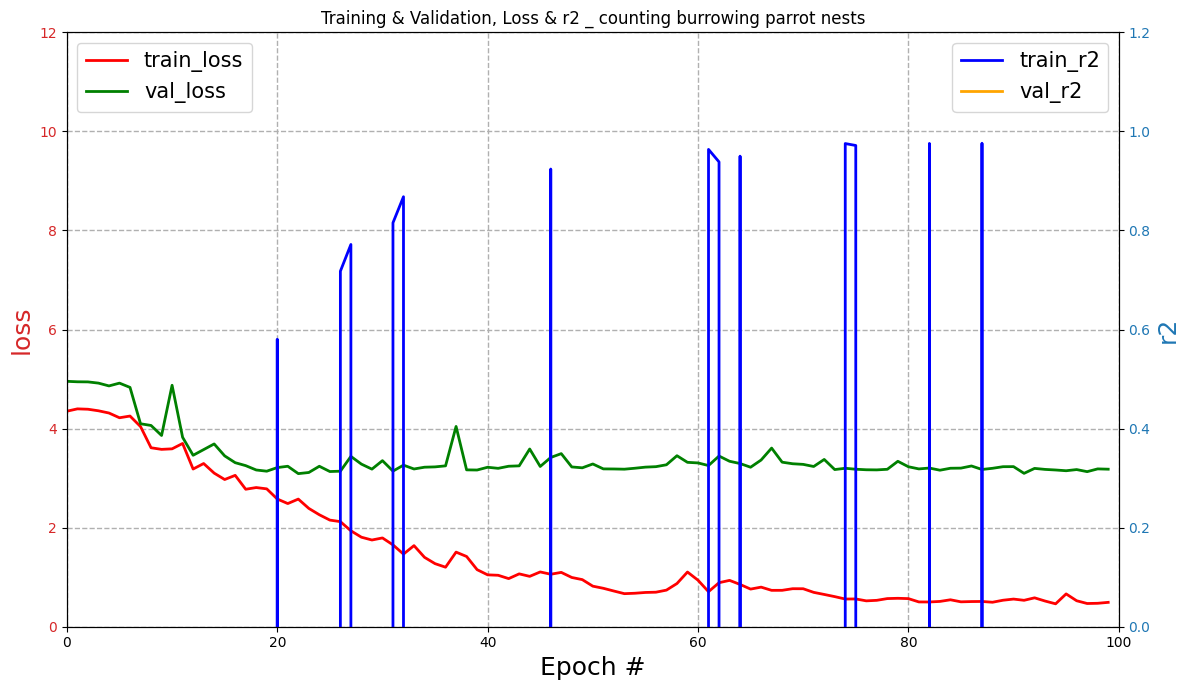

In [ ]:
# Plot

plt.rcParams["figure.figsize"] = (12,7)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch #', fontsize=18)
ax1.set_ylabel('loss', color=color, fontsize=18)
ax1.set_xlim(0, NUM_EPOCHS)
ax1.set_ylim(0, 12)
ax1.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss", c='red', linewidth='2')
ax1.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss", c='green', linewidth='2')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dashed', linewidth='1')
ax1.legend(loc='upper left', fontsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('r2', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.set_ylim(0,1.2)
ax2.plot(np.arange(0, NUM_EPOCHS), H.history["r2"], label="train_r2", c='blue', linewidth='2')
ax2.plot(np.arange(0, NUM_EPOCHS), H.history["val_r2"], label="val_r2", c='orange', linewidth='2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', fontsize=15)

plt.title("Training & Validation, Loss & r2 _ counting burrowing parrot nests")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Testing the Model


In [ ]:
pred = model.predict(x_test, batch_size=BATCH_SIZE)      # delivers dimensions (qty-inicio_test, 256, 256, 1)
pred_ = np.squeeze(pred, axis=3)

print(N)
print(pred.shape)
print(pred_.shape)

4/4 [==============================] - 1s 115ms/step
296
(16, 256, 256, 1)
(16, 256, 256)


In [ ]:
lista_test = []

for i in rango_test:

    lista_test.append( r2_score(densidad_aum_test[i-inicio_test], pred_[i-inicio_test]))
    print('\nr2_score test image #',i,'=', r2_score(densidad_aum_test[i-inicio_test], pred_[i-inicio_test]))

print('\n\n############ mean testing r2_score = %.2f' %np.mean(lista_test) + '  ############')


r2_score test image # 296 = 0.0

r2_score test image # 297 = 0.0

r2_score test image # 298 = -79.14300159950129

r2_score test image # 299 = -11.042360518038596

r2_score test image # 300 = 0.0

r2_score test image # 301 = 0.0

r2_score test image # 302 = 0.7096952236611767

r2_score test image # 303 = -21443.764426146772

r2_score test image # 304 = 0.0

r2_score test image # 305 = 0.0

r2_score test image # 306 = -92.7589639432006

r2_score test image # 307 = 0.0

r2_score test image # 308 = 0.0

r2_score test image # 309 = -1.9114376907875434

r2_score test image # 310 = 0.0

r2_score test image # 311 = -2.0219415891049266


############ mean testing r2_score = -1351.87  ############


### CNN UNet gives us artificial density maps, we visualize them


In [ ]:
# First we de-scale the density maps to correct values, using the factor we had saved for it.

dens_pred_descaled = pred_ / factor

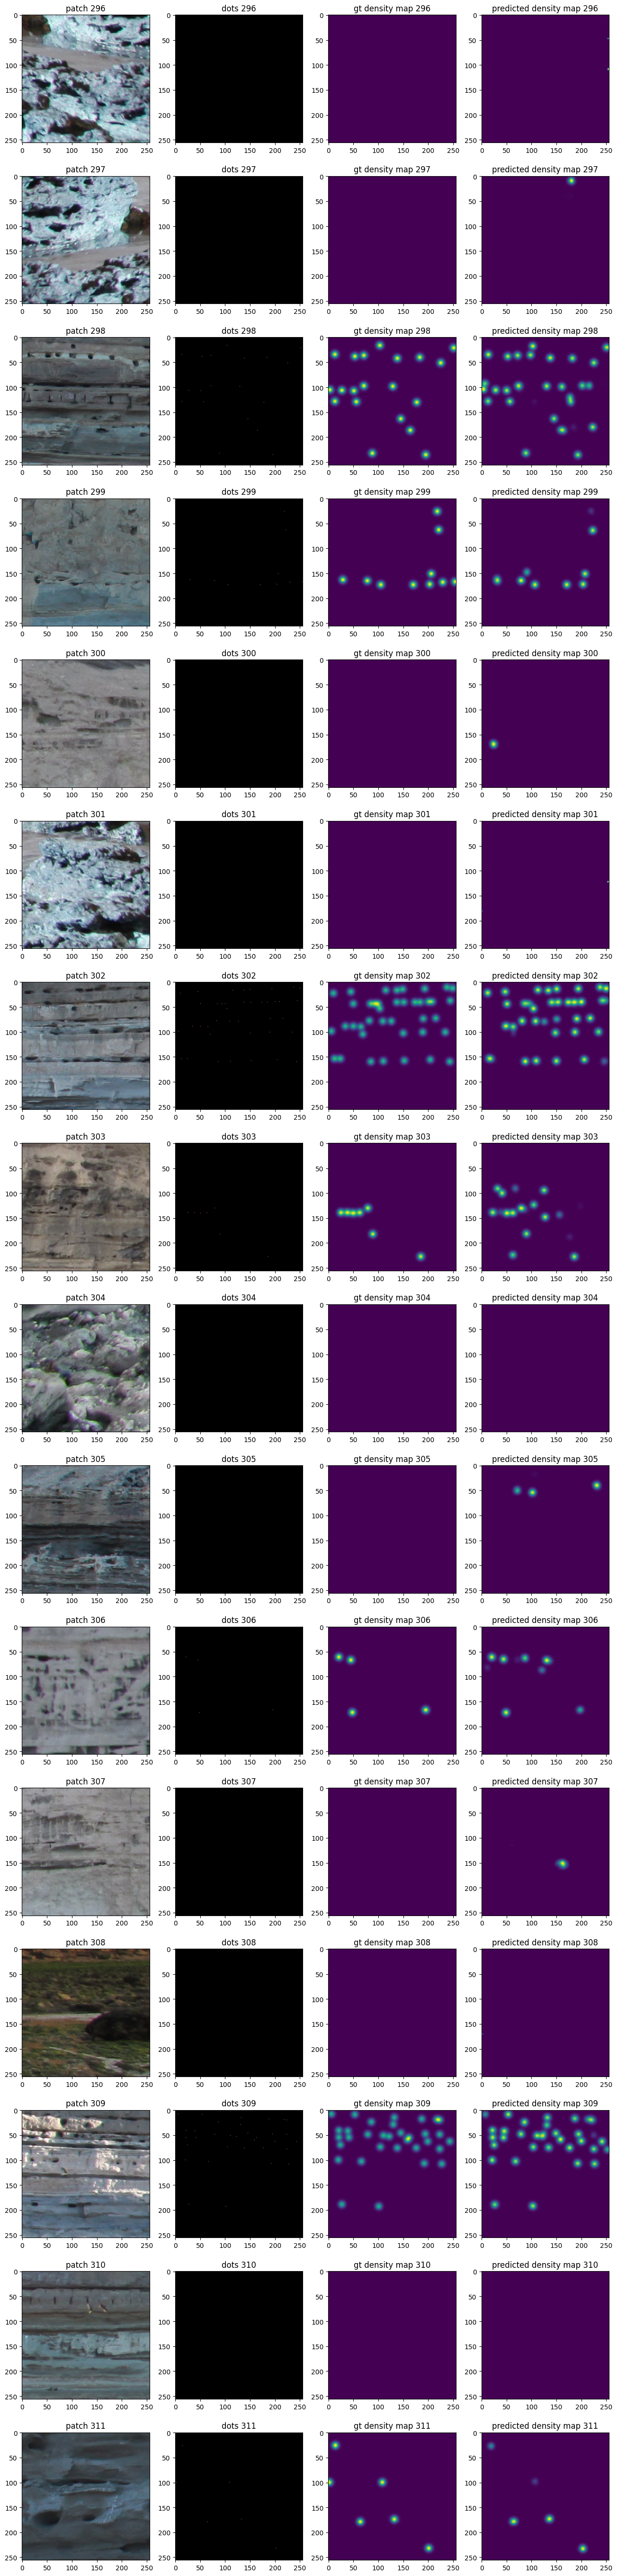

In [ ]:
fig, ax = plt.subplots(qty-N,4, figsize=(16, 70))

for i in range(N, qty):

    ax[i-N, 0].imshow(imagen[i])
    ax[i-N, 1].imshow(puntos[i])
    ax[i-N, 2].imshow(densidad_gt[i])
    ax[i-N, 3].imshow(dens_pred_descaled[i-N])


    ax[i-N, 0].set_title('patch ' + str(i))
    ax[i-N, 1].set_title('dots ' + str(i))
    ax[i-N, 2].set_title('gt density map '+ str(i))
    ax[i-N, 3].set_title('predicted density map '+ str(i))

plt.show()

## Counting the objects

In [ ]:
print(rango_test)

range(296, 312)


In [ ]:
# We show object counts over the real image, ground truth (density through Gaussian kernel),
# count over the density map estimated through the CNN model, and Error. We do it on the test images.

error = []
error_porcentual = []
error_absoluto = []

for i in rango_test:

    real     = puntos[i][:,:,0].sum()
    gt       = densidad_gt[i].sum()
    estimado = dens_pred_descaled[i-inicio_test].sum()

    print('\nActual count image %d                 = ' %i +  '%.0f' %real)
    print('Estimated count image %d              ='%i + ' %.0f' %estimado)
    error.append(estimado - real)


    error_absoluto.append(abs(estimado - real))
    print('Error (estimated vs actual)            = %.1f' %(estimado - real))


    error_porcentual.append( 100.*abs(estimado - real) / real)
    print('Percentage Error (estimated vs actual) = %.2f' %(100.*(estimado - real) / real) + '%')

print('\n\n######## Mean Absolute Error = %.1f' %(sum(error_absoluto)/len(rango_test)) + ' #######')
print('\n######## Percentage Mean Absolute Error = %.1f' %(sum(error_porcentual)/len(rango_test)) + '%' + ' #######' )

print('\n######## Maximum Absolute Error = %.1f' %max(error_absoluto) + ' #######')


Actual count image 296                 = 0
Estimated count image 296              = 0
Error (estimated vs actual)            = 0.0
Percentage Error (estimated vs actual) = inf%

Actual count image 297                 = 0
Estimated count image 297              = 0
Error (estimated vs actual)            = 0.5
Percentage Error (estimated vs actual) = inf%

Actual count image 298                 = 20
Estimated count image 298              = 25
Error (estimated vs actual)            = 4.9
Percentage Error (estimated vs actual) = 24.50%

Actual count image 299                 = 10
Estimated count image 299              = 7
Error (estimated vs actual)            = -2.6
Percentage Error (estimated vs actual) = -26.24%

Actual count image 300                 = 0
Estimated count image 300              = 0
Error (estimated vs actual)            = 0.4
Percentage Error (estimated vs actual) = inf%

Actual count image 301                 = 0
Estimated count image 301              = 0
Error (estimat

<ipython-input-30-25a474a73647>:23: RuntimeWarning: divide by zero encountered in double_scalars
  error_porcentual.append( 100.*abs(estimado - real) / real)
<ipython-input-30-25a474a73647>:24: RuntimeWarning: divide by zero encountered in double_scalars
  print('Percentage Error (estimated vs actual) = %.2f' %(100.*(estimado - real) / real) + '%')


## We are going to visualize the filters and feature maps of some convolutional layers

Ref: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c

### Visualizing the filters

conv2d
(3, 3, 3, 64)
64


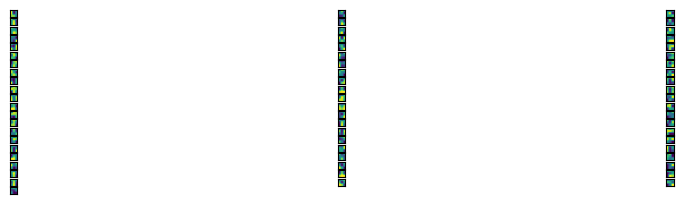

conv2d_1
(3, 3, 64, 64)
64


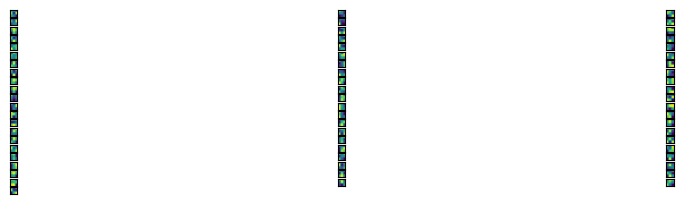

conv2d_2
(3, 3, 64, 128)
128


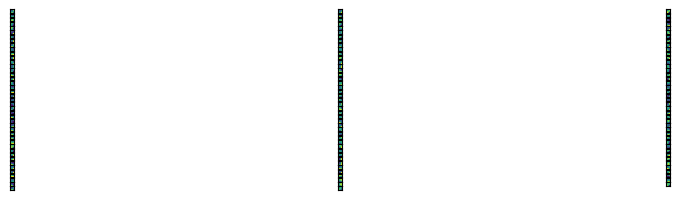

conv2d_3
(3, 3, 128, 128)
128


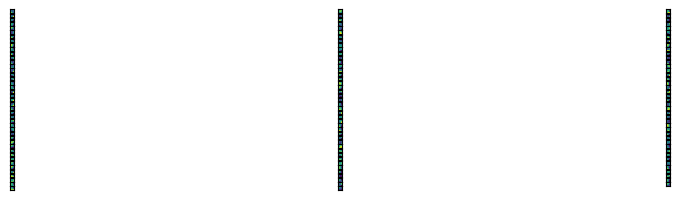

conv2d_4
(3, 3, 128, 256)
256


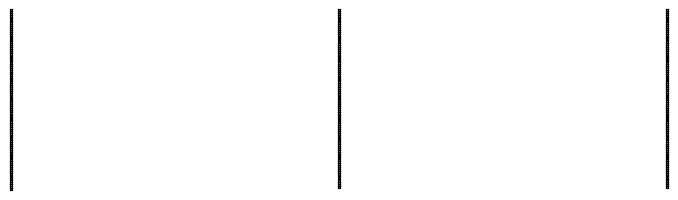

conv2d_5
(3, 3, 256, 256)
256


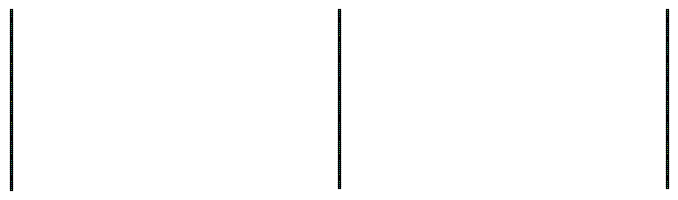

conv2d_6
(3, 3, 256, 512)
512


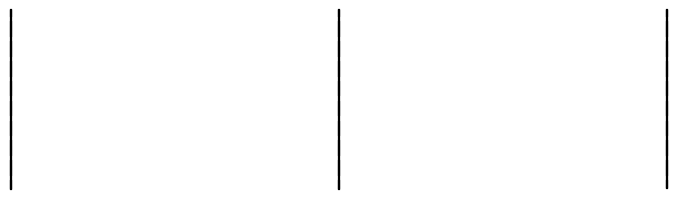

conv2d_7
(3, 3, 512, 512)
512


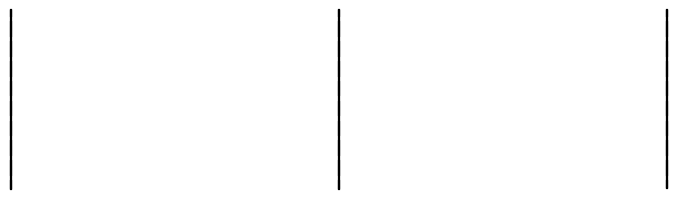

conv2d_8
(3, 3, 512, 1024)
1024


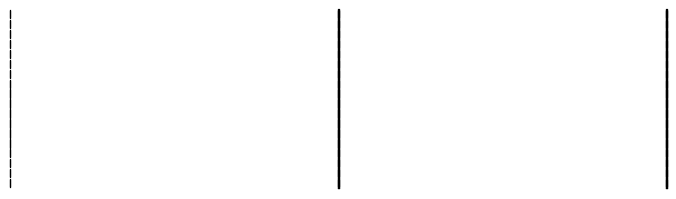

conv2d_9
(3, 3, 1024, 1024)
1024


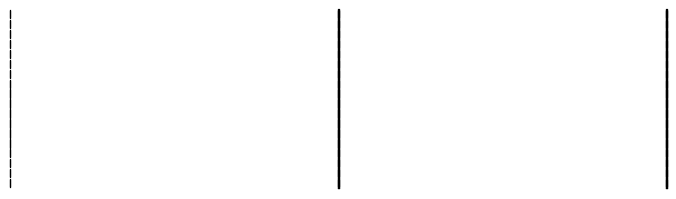

conv2d_10
(2, 2, 1024, 512)
512


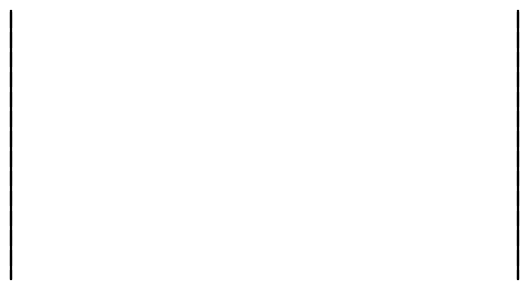

conv2d_11
(3, 3, 1024, 512)
512


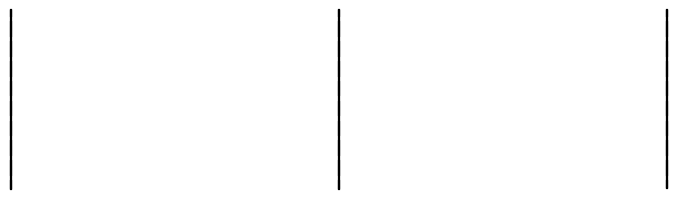

conv2d_12
(3, 3, 512, 512)
512


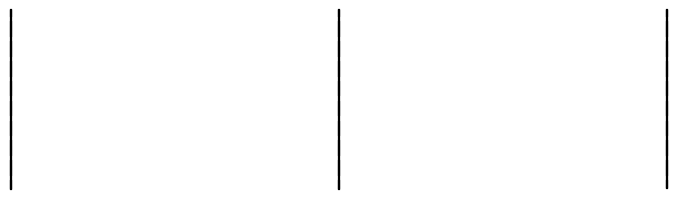

conv2d_13
(2, 2, 512, 256)
256


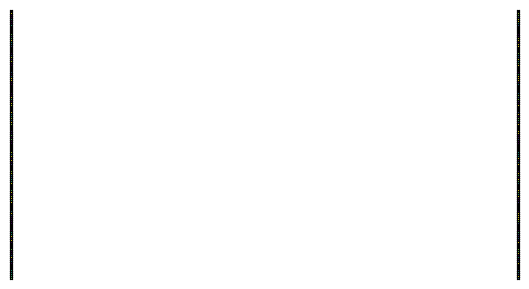

conv2d_14
(3, 3, 512, 256)
256


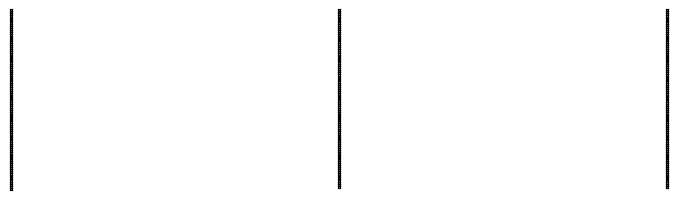

conv2d_15
(3, 3, 256, 256)
256


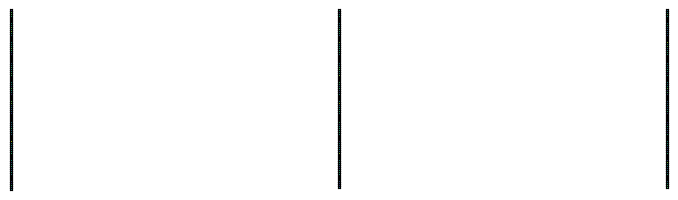

conv2d_16
(2, 2, 256, 128)
128


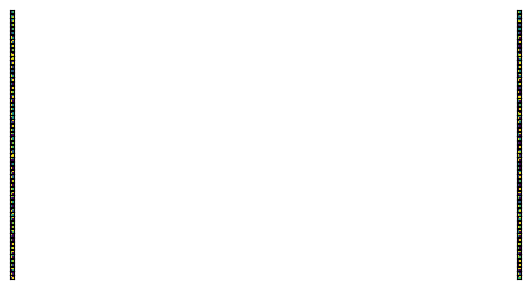

conv2d_17
(3, 3, 256, 128)
128


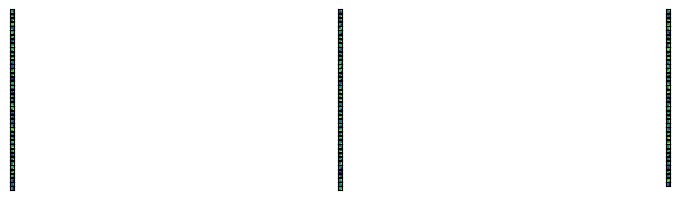

conv2d_18
(3, 3, 128, 128)
128


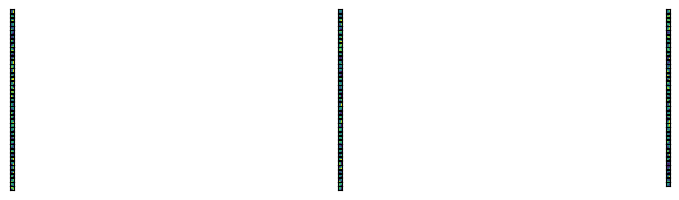

conv2d_19
(2, 2, 128, 64)
64


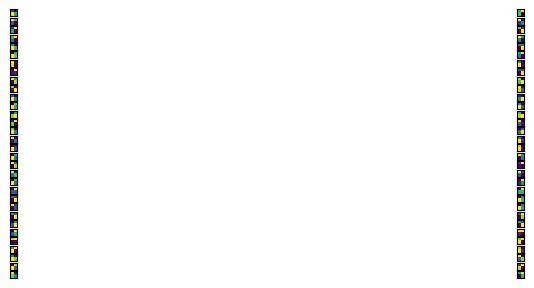

conv2d_20
(3, 3, 128, 64)
64


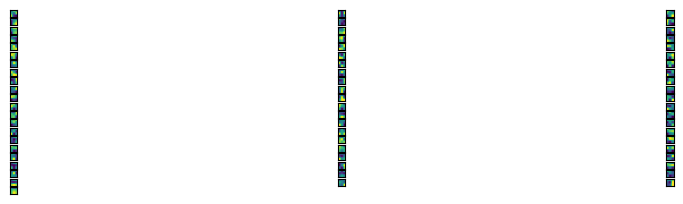

conv2d_21
(3, 3, 64, 64)
64


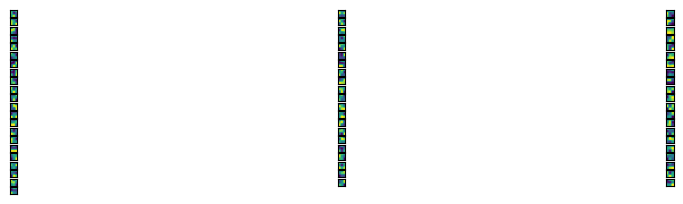

conv2d_22
(3, 3, 64, 2)
2


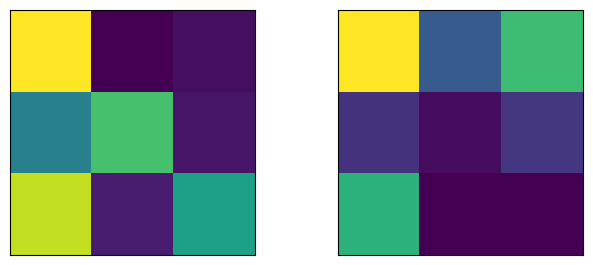

conv2d_23
(1, 1, 2, 1)
1


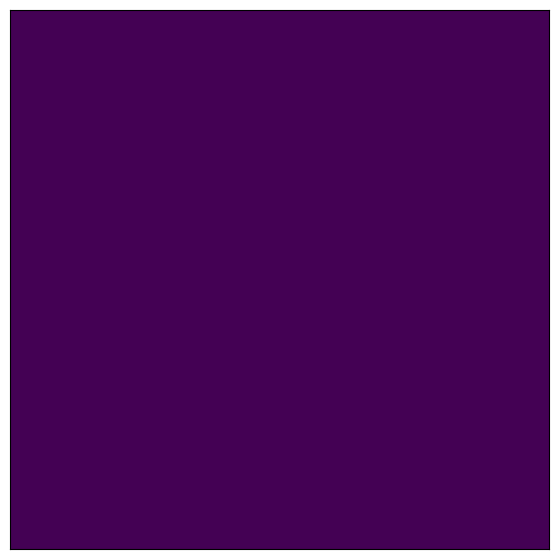

In [ ]:
# Filters of the first convolutional layer

#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name) #, filters.shape)

        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape)
        print(filters.shape[3])
        filter_cnt=1

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channels, color image RGB channels
            for j in range(1):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

### Visualizing feature maps

1/1 [==============================] - 0s 382ms/step
(1, 256, 256, 64)


<ipython-input-32-3afe9ae72953>:40: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


(1, 256, 256, 64)
(1, 128, 128, 64)
(1, 128, 128, 128)
(1, 128, 128, 128)
(1, 64, 64, 128)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 32, 32, 256)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 16, 16, 512)
(1, 16, 16, 1024)
(1, 16, 16, 1024)
(1, 16, 16, 1024)
(1, 32, 32, 1024)
(1, 32, 32, 512)
(1, 32, 32, 1024)
(1, 32, 32, 512)
(1, 32, 32, 512)


<ipython-input-32-3afe9ae72953>:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure( figsize=(scale * n_features, scale) )


(1, 64, 64, 512)
(1, 64, 64, 256)
(1, 64, 64, 512)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 128, 128, 256)
(1, 128, 128, 128)
(1, 128, 128, 256)
(1, 128, 128, 128)
(1, 128, 128, 128)
(1, 256, 256, 128)
(1, 256, 256, 64)
(1, 256, 256, 128)
(1, 256, 256, 64)
(1, 256, 256, 64)
(1, 256, 256, 2)
(1, 256, 256, 1)


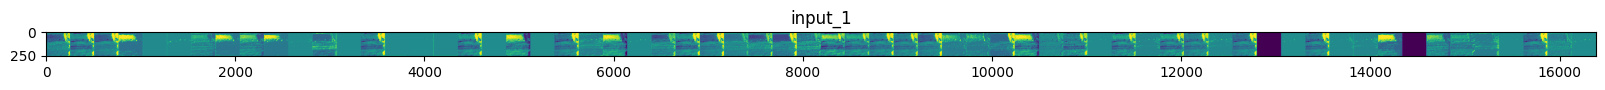

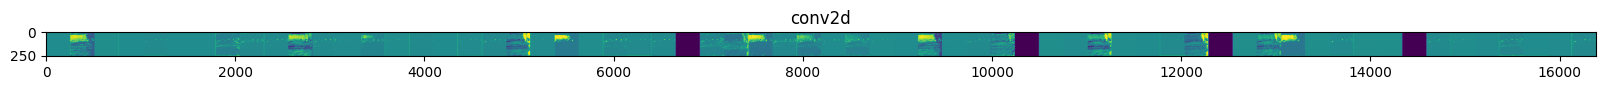

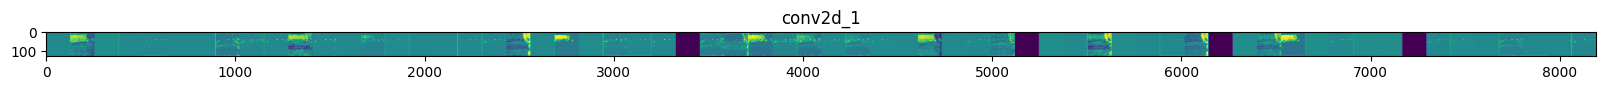

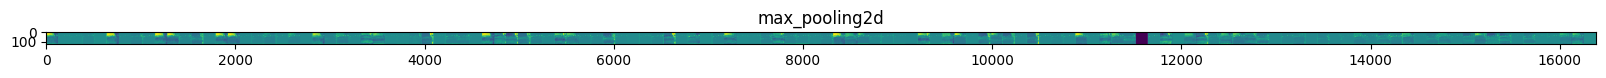

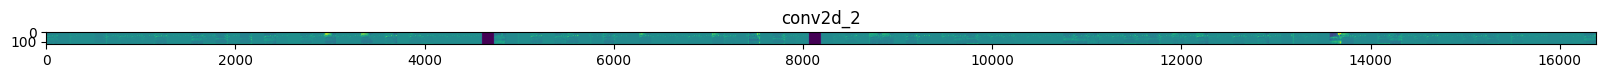

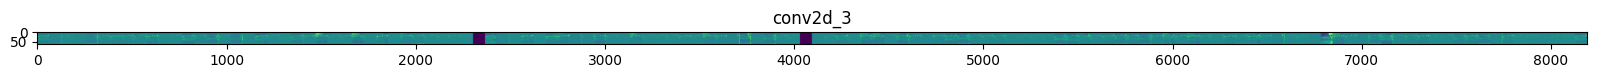

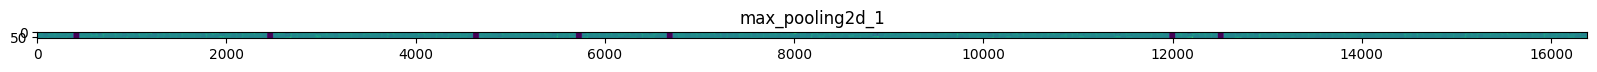

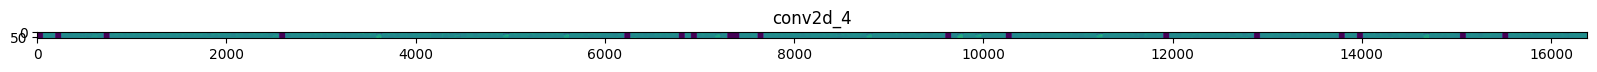

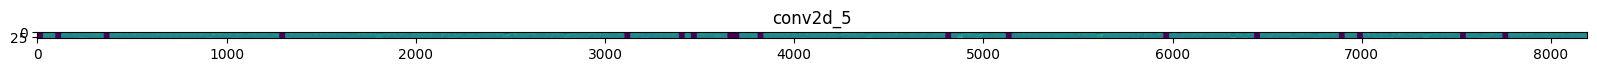

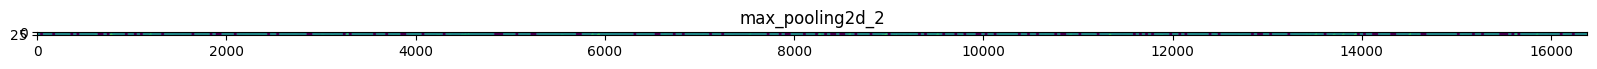

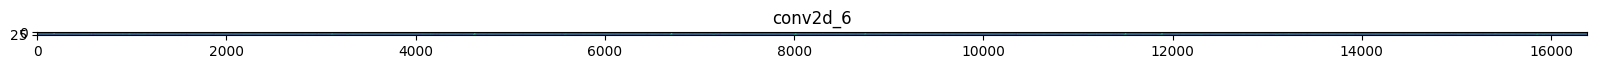

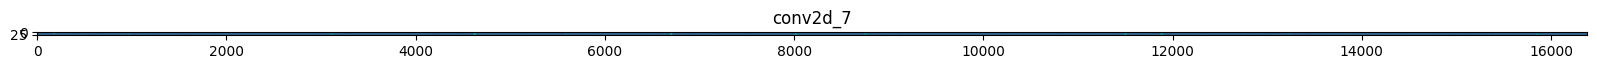

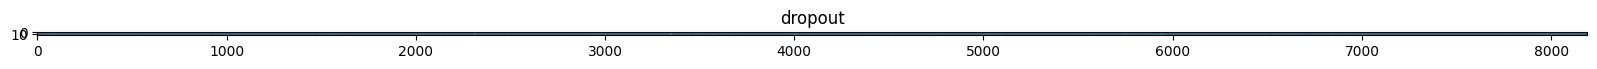

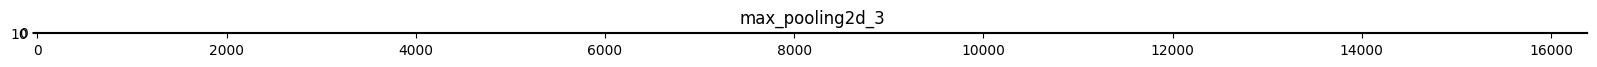

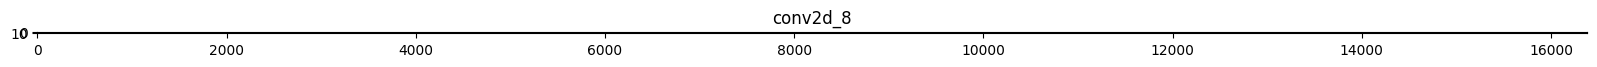

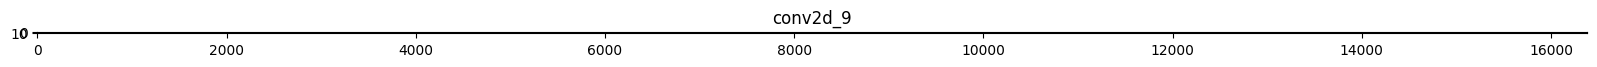

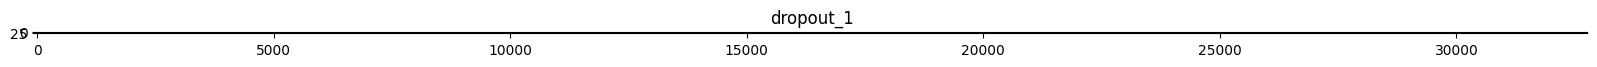

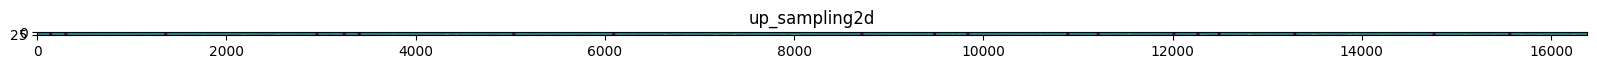

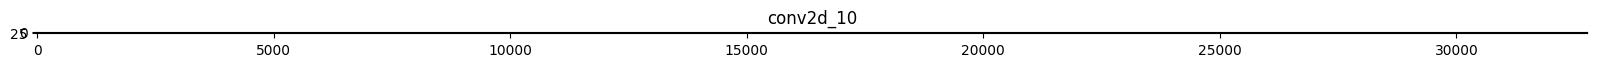

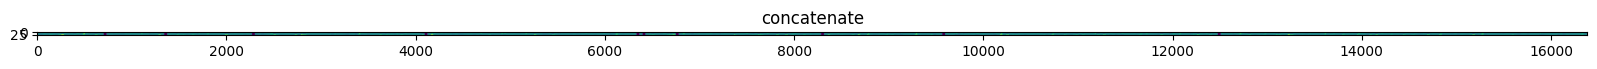

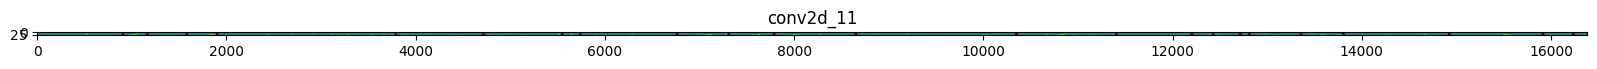

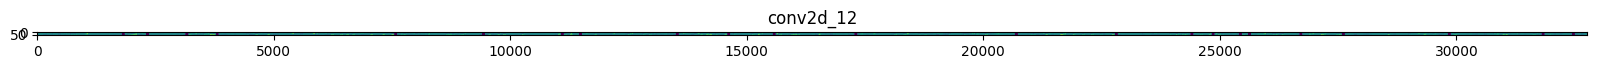

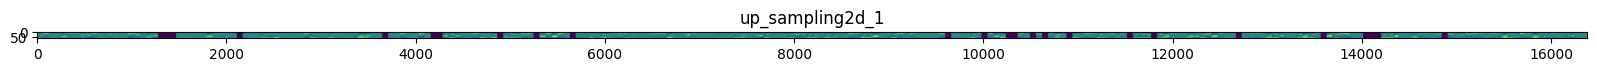

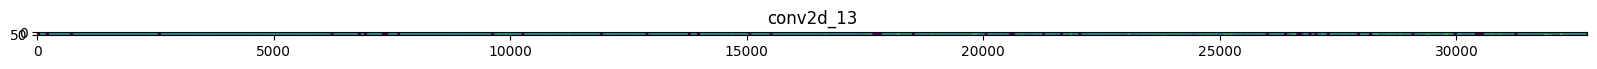

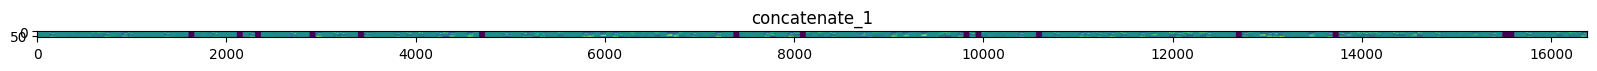

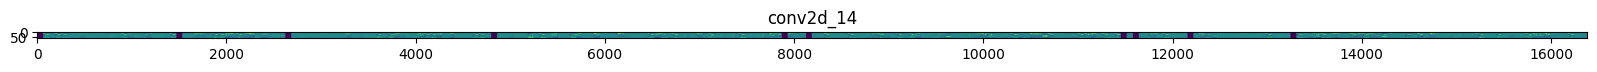

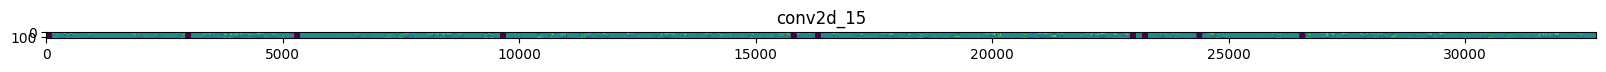

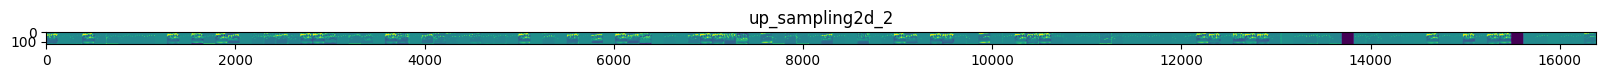

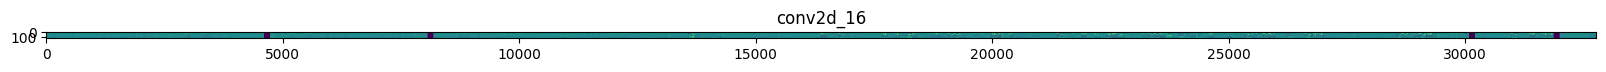

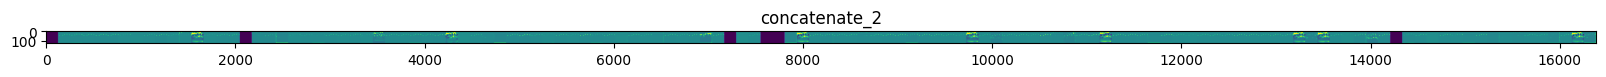

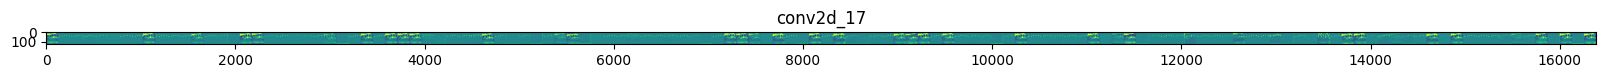

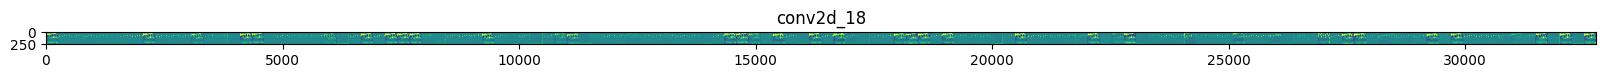

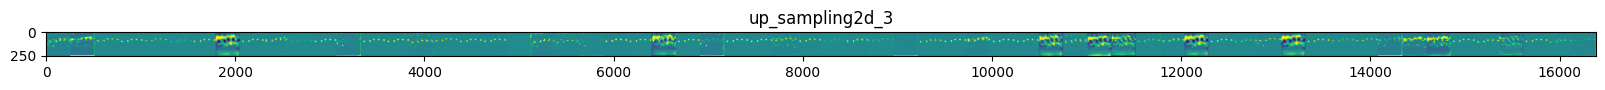

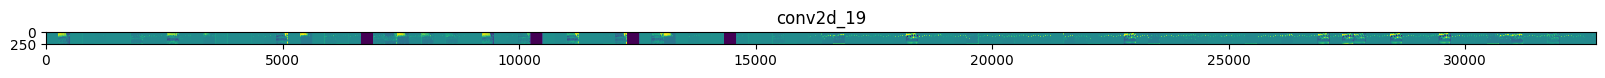

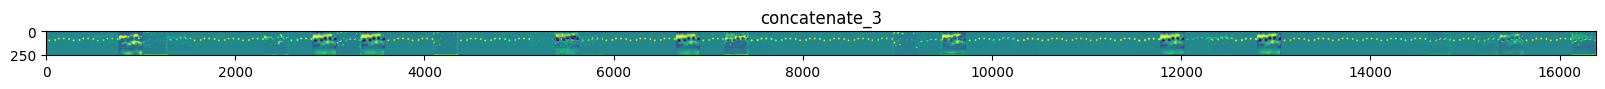

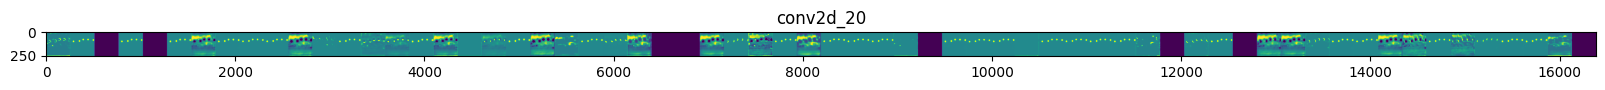

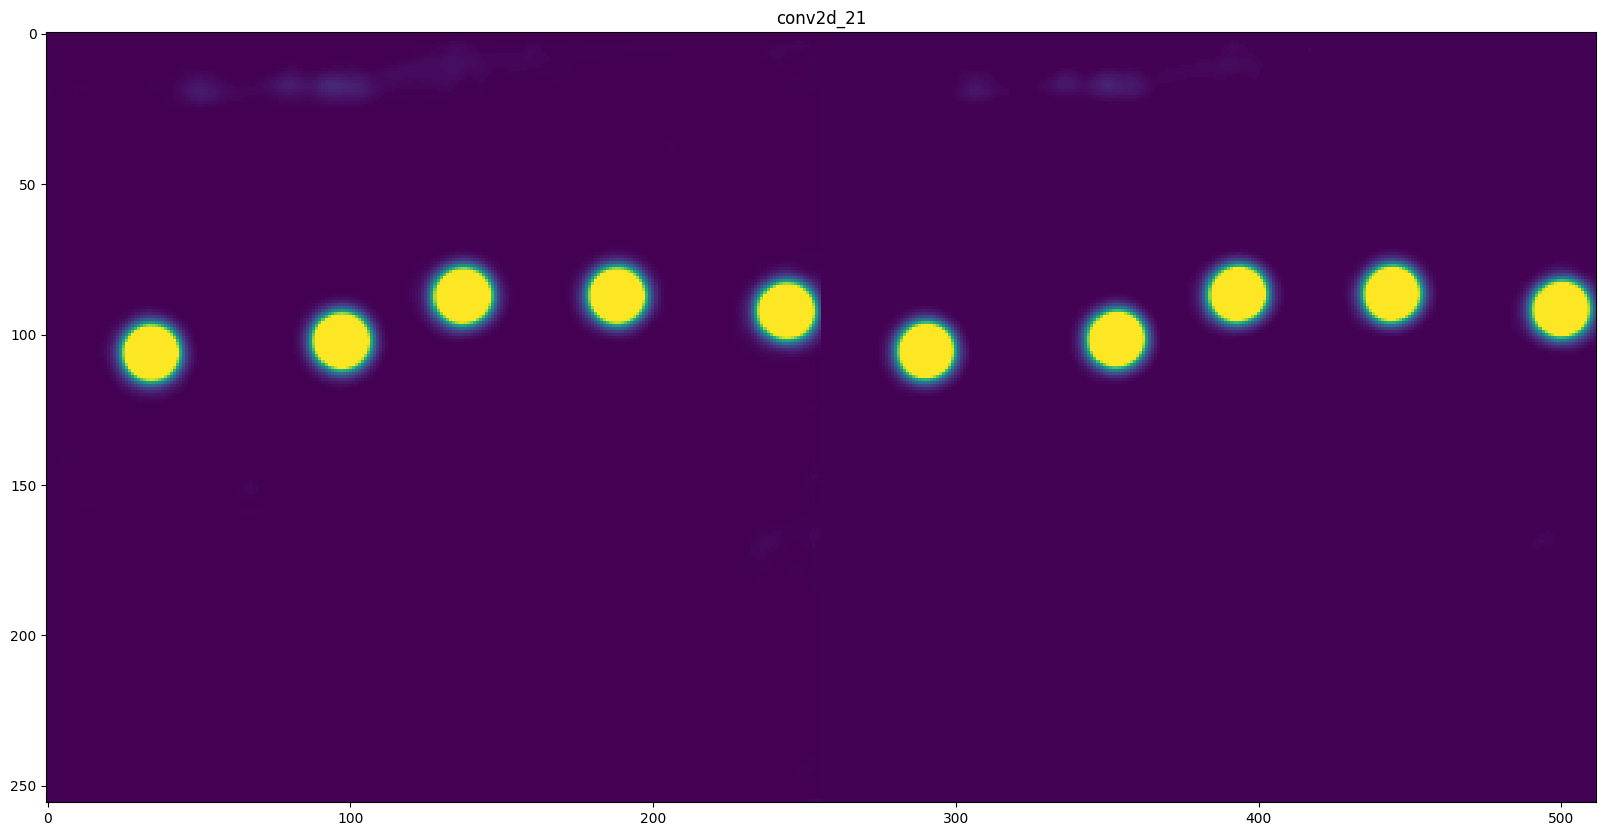

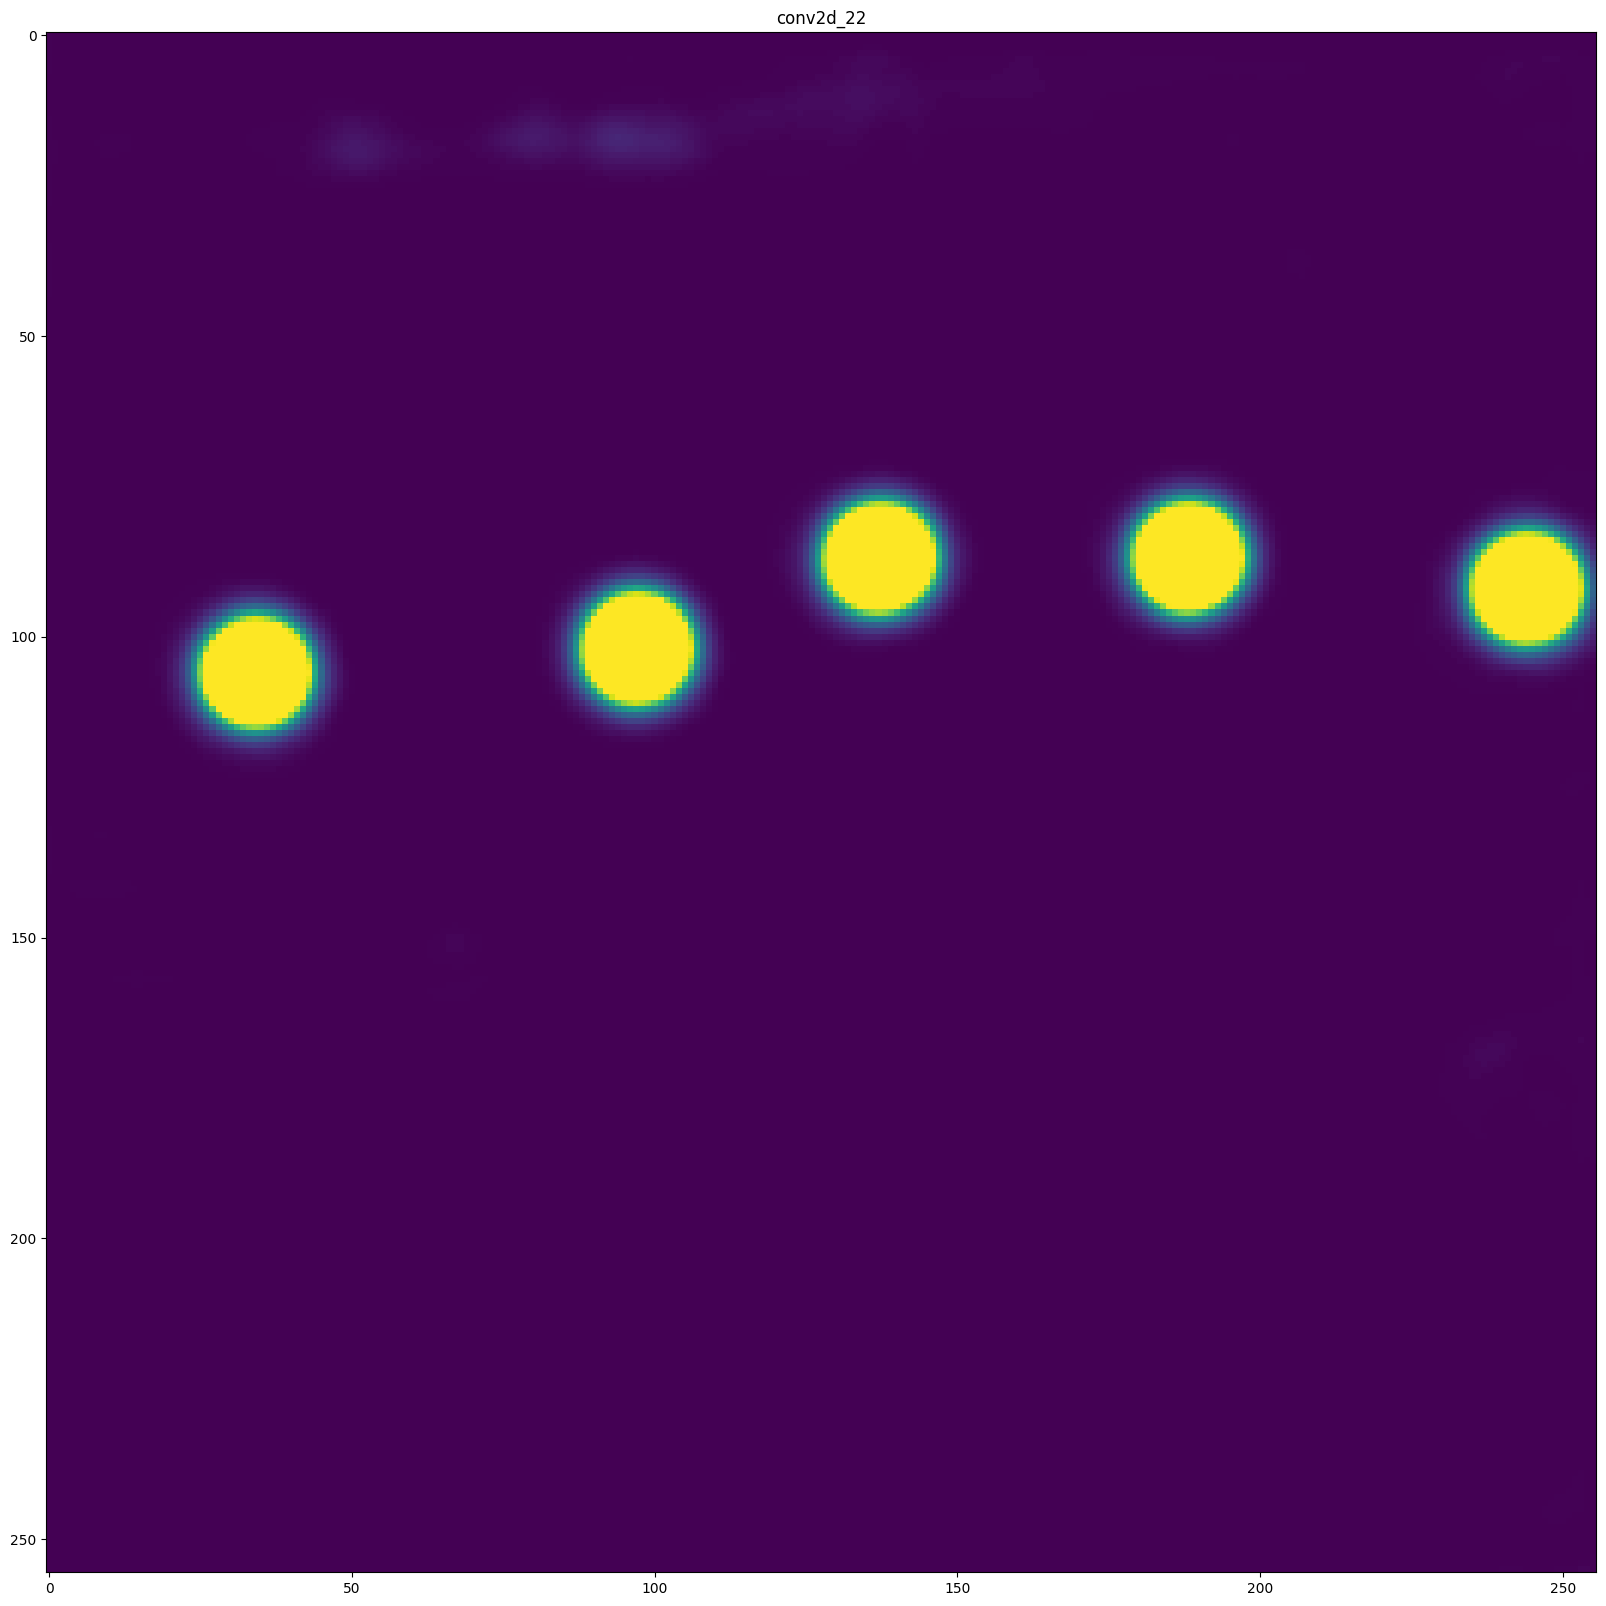

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
# visualization_model = Model(img_input, successive_outputs)

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#Load the input image
img = imagen[1]

x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
#x /= 255.0

# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
# summarize feature map size for each conv layer
from matplotlib import pyplot

# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 conv2d (None, 256, 256, 64)
2 conv2d_1 (None, 256, 256, 64)
4 conv2d_2 (None, 128, 128, 128)
5 conv2d_3 (None, 128, 128, 128)
7 conv2d_4 (None, 64, 64, 256)
8 conv2d_5 (None, 64, 64, 256)
10 conv2d_6 (None, 32, 32, 512)
11 conv2d_7 (None, 32, 32, 512)
14 conv2d_8 (None, 16, 16, 1024)
15 conv2d_9 (None, 16, 16, 1024)
18 conv2d_10 (None, 32, 32, 512)
20 conv2d_11 (None, 32, 32, 512)
21 conv2d_12 (None, 32, 32, 512)
23 conv2d_13 (None, 64, 64, 256)
25 conv2d_14 (None, 64, 64, 256)
26 conv2d_15 (None, 64, 64, 256)
28 conv2d_16 (None, 128, 128, 128)
30 conv2d_17 (None, 128, 128, 128)
31 conv2d_18 (None, 128, 128, 128)
33 conv2d_19 (None, 256, 256, 64)
35 conv2d_20 (None, 256, 256, 64)
36 conv2d_21 (None, 256, 256, 64)
37 conv2d_22 (None, 256, 256, 2)
38 conv2d_23 (None, 256, 256, 1)


In [ ]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [ ]:
# load the image with the required shape

img = imagen[1]
img.shape

(256, 256, 3)

In [ ]:
# expand dimensions so that it represents a single 'sample'
img_ = np.expand_dims(img, axis=0)


# get feature map for first hidden layer
feature_maps = model.predict(img_)

1/1 [==============================] - 0s 48ms/step


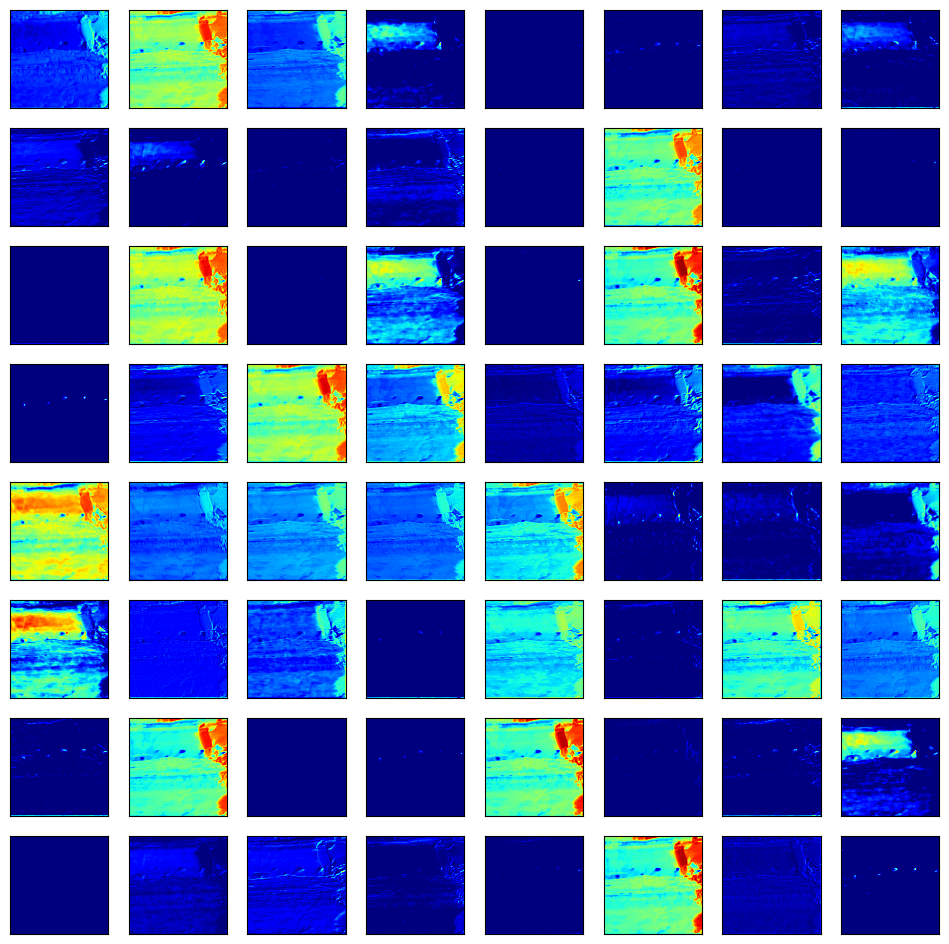

In [ ]:
# plot all 64 maps in an 8x8 squares. They are the first 64 activation maps from the first convolutional layer
square = 8
ix = 1


#'figure.figsize': [6.0, 4.0]

plt.rcParams["figure.figsize"] = (12,12)

for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='jet')
		ix += 1
# show the figure
plt.show()